In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,confusion_matrix

In [11]:
df = pd.read_csv(r"C:\Users\nagas\Downloads\dairy_dataset.csv")
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64

In [4]:
df.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


In [ ]:
#EDA

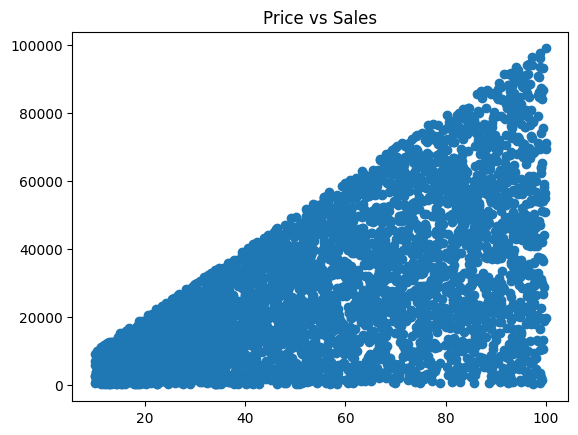

In [5]:
plt.scatter(df['Price per Unit'], df['Total Value'])
plt.title("Price vs Sales")
plt.show()

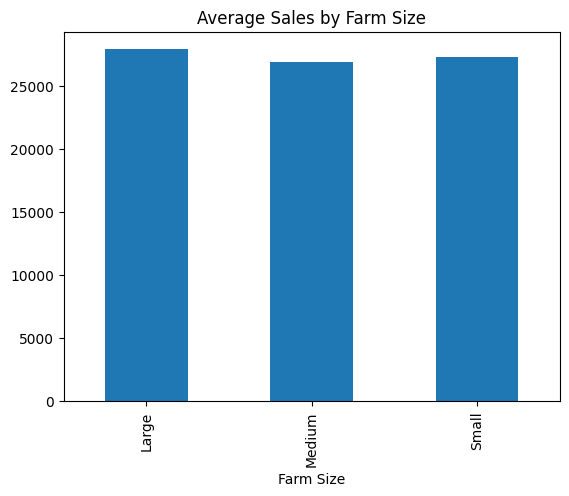

In [6]:
avg_sales_farm = df.groupby('Farm Size')['Total Value'].mean()
avg_sales_farm.plot(kind='bar', title="Average Sales by Farm Size")
plt.show()

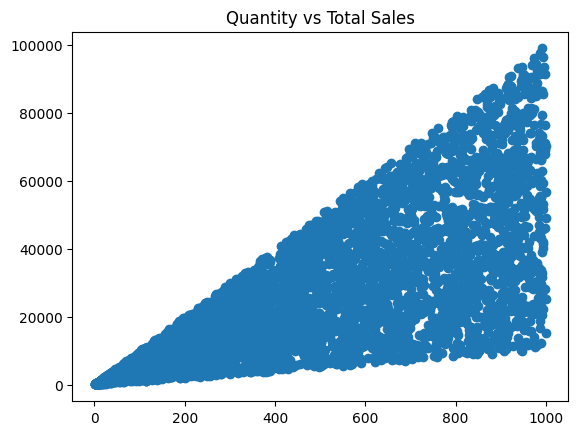

In [7]:
plt.scatter(df['Quantity (liters/kg)'], df['Total Value'])
plt.title("Quantity vs Total Sales")
plt.show()

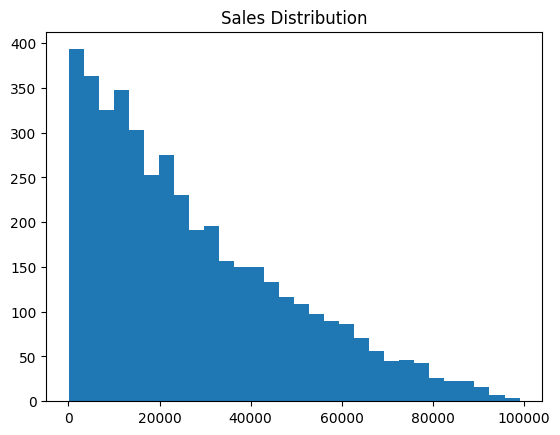

In [8]:
plt.hist(df['Total Value'], bins=30)
plt.title("Sales Distribution")
plt.show()

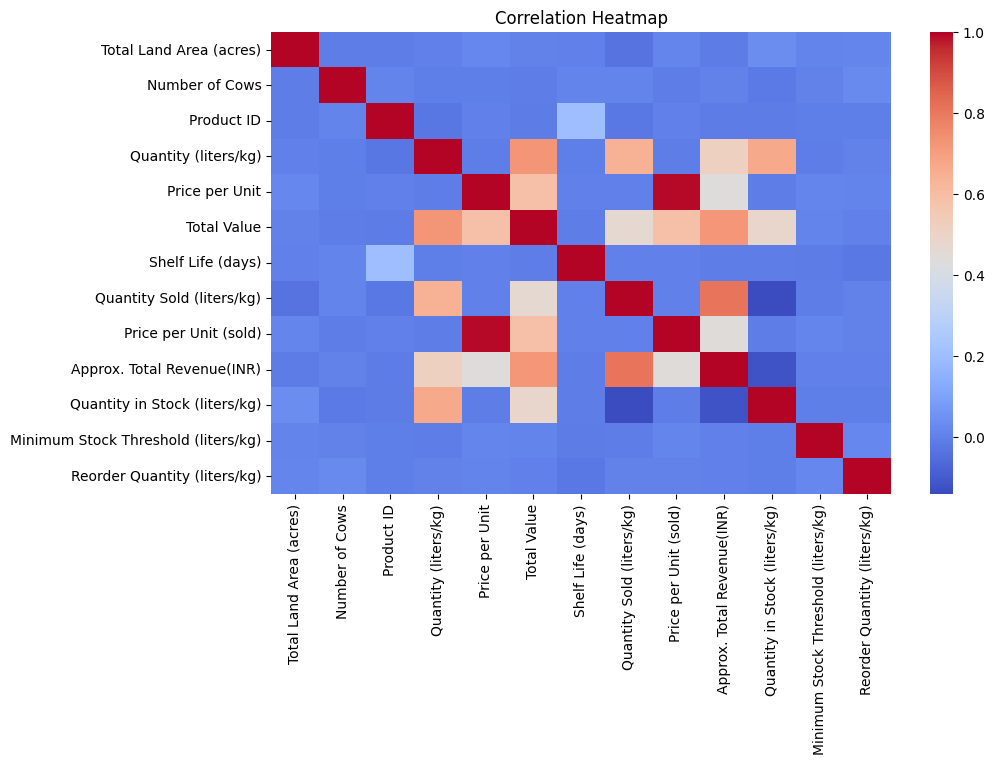

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

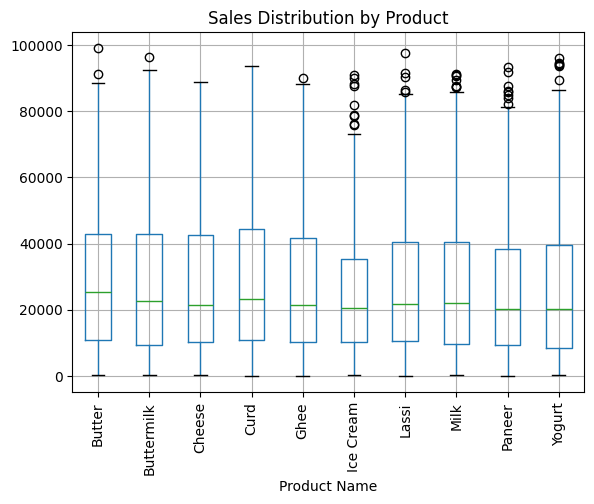

In [12]:
df.boxplot(column='Total Value', by='Product Name', rot=90)
plt.title("Sales Distribution by Product")
plt.suptitle("")
plt.show()

In [ ]:
#DATA PREPROCESSING

In [14]:
reg_features = ['Quantity (liters/kg)','Price per Unit','Number of Cows','Total Land Area (acres)']
X_reg = df[reg_features]
y_reg = df['Total Value']
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

In [ ]:
#lINEAR REGRESSION

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

y_pred_lr = lr.predict(X_test_reg)
print(y_pred_lr)

[ 1.82338160e+04  6.76708005e+03  4.33943545e+03 -4.34246373e+03
  1.27460732e+04  2.41567737e+04  5.14007509e+04  3.99469556e+04
  5.23680730e+04  1.57480505e+04  3.62254963e+04  1.09795073e+03
  6.44011605e+03  3.12085970e+04  3.94928087e+04  1.99861614e+04
  2.29964260e+04  5.68211348e+04 -3.36199182e+03  1.65046974e+04
  2.94682044e+04 -3.07005098e+03  2.63047844e+04  5.92350014e+04
 -1.12224036e+04  1.24926838e+04  1.42820057e+04  1.69177155e+04
  1.48547715e+04  2.68229443e+04  3.31619768e+04  3.31957246e+03
  1.98816091e+04  3.05529006e+04  5.81613889e+03  1.90007975e+03
  2.33403965e+04  5.18622722e+04  1.02488756e+04  6.40165502e+04
  7.07395918e+04  6.94361637e+03  4.17772360e+04  5.24943351e+04
 -1.00721888e+03  4.32973174e+04  1.04851130e+04  3.73675200e+04
  5.37868590e+04  5.55226113e+04 -1.56688992e+03  8.00939207e+03
  3.76257187e+04  3.64109682e+04  1.98560078e+04  6.51518296e+04
  4.87221109e+04  1.61766192e+04 -6.36189024e+03  4.84964884e+04
  2.69099457e+04  5.92480

In [17]:
print("MAE:", mean_absolute_error(y_test_reg, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lr)))
print("R2:", r2_score(y_test_reg, y_pred_lr))

MAE: 5759.334330838601
RMSE: 7688.88061176683
R2: 0.8796362679562721


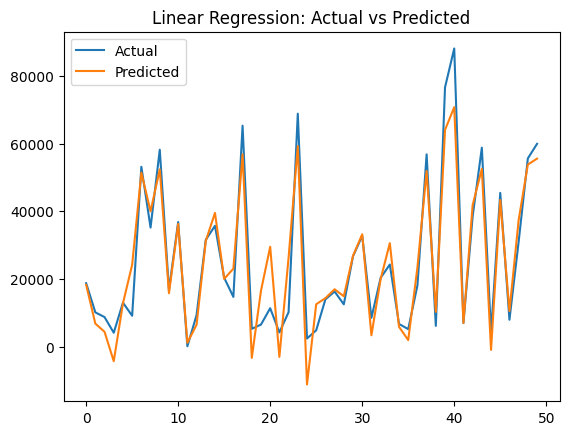

In [18]:
plt.plot(y_test_reg.values[:50], label='Actual')
plt.plot(y_pred_lr[:50], label='Predicted')
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

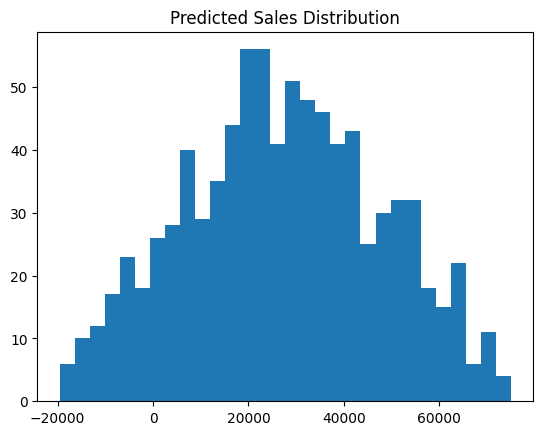

In [40]:
plt.hist(y_pred_lr, bins=30)
plt.title("Predicted Sales Distribution")
plt.show()

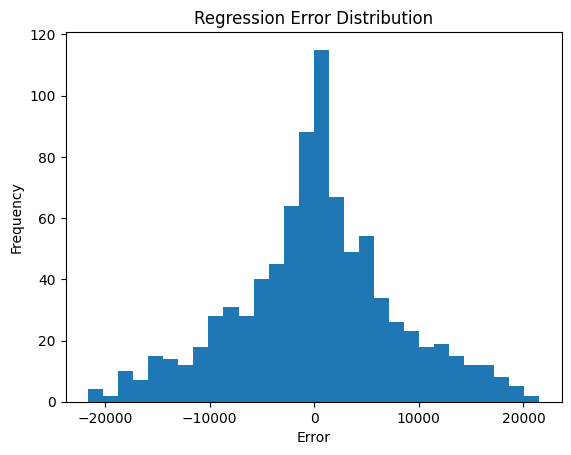

In [41]:
errors = y_test_reg - y_pred_lr
plt.figure()
plt.hist(errors, bins=30)
plt.title("Regression Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#RANDOM FOREST CLASSIFIER

In [20]:
df['Stock_Status'] = (
    df['Quantity in Stock (liters/kg)'] <
    df['Minimum Stock Threshold (liters/kg)']
).astype(int)
df_encoded = pd.get_dummies(df, drop_first=True)

X_cls = df_encoded.drop('Stock_Status', axis=1)
y_cls = df['Stock_Status']

X_cls_scaled = scaler.fit_transform(X_cls)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls_scaled, y_cls, test_size=0.2, random_state=42
)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_cls, y_train_cls)

y_pred_cls = rf_clf.predict(X_test_cls)
y_prob_cls = rf_clf.predict_proba(X_test_cls)[:,1]
print(y_prob_cls)

[0.03 0.09 0.09 0.45 0.09 0.01 0.02 0.01 0.12 0.   0.01 0.89 0.03 0.02
 0.06 0.49 0.6  0.03 0.3  0.57 0.04 0.54 0.15 0.02 0.58 0.92 0.03 0.66
 0.04 0.02 0.49 0.56 0.02 0.04 0.31 0.13 0.05 0.05 0.67 0.02 0.01 0.1
 0.72 0.   0.06 0.04 0.6  0.   0.02 0.08 0.43 0.91 0.08 0.02 0.38 0.04
 0.01 0.02 0.19 0.05 0.71 0.   0.07 0.01 0.49 0.12 0.04 0.51 0.05 0.71
 0.   0.2  0.01 0.15 0.06 0.9  0.01 0.72 0.01 0.08 0.03 0.02 0.03 0.04
 0.   0.05 0.01 0.54 0.11 0.3  0.04 0.06 0.03 0.02 0.12 0.84 0.05 0.39
 0.02 0.02 0.93 0.03 0.04 0.18 0.62 0.   0.18 0.02 0.74 0.02 0.1  0.39
 0.06 0.87 0.03 0.02 0.67 0.36 0.22 0.04 0.13 0.   0.02 0.73 0.1  0.07
 0.09 0.05 0.75 0.72 0.05 0.23 0.15 0.05 0.03 0.88 0.12 0.74 0.07 0.01
 0.04 0.   0.11 0.05 0.04 0.04 0.03 0.7  0.13 0.03 0.05 0.01 0.08 0.06
 0.15 0.04 0.01 0.67 0.03 0.02 0.58 0.61 0.15 0.59 0.08 0.32 0.06 0.11
 0.04 0.08 0.05 0.56 0.89 0.78 0.02 0.58 0.03 0.84 0.04 0.68 0.05 0.07
 0.05 0.51 0.03 0.1  0.05 0.11 0.1  0.22 0.37 0.8  0.02 0.05 0.04 0.37
 0.13 0

In [24]:
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))

Accuracy: 0.9560693641618497
Confusion Matrix:
 [[663   8]
 [ 30 164]]


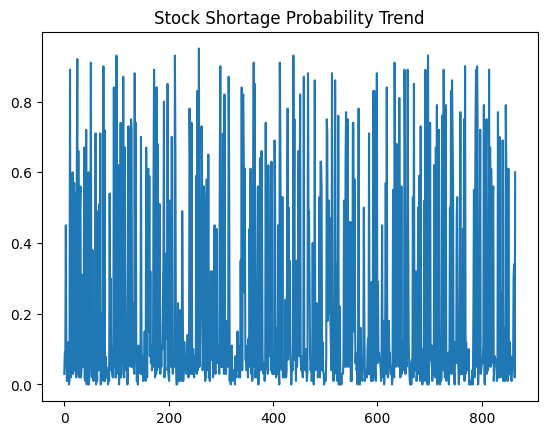

In [25]:
plt.plot(y_prob_cls)
plt.title("Stock Shortage Probability Trend")
plt.show()

In [ ]:
#K-MEANS CLUSTER

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cls_scaled)

In [28]:
print("Inertia:", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(X_cls_scaled, clusters))

Inertia: 18100723.556853127
Silhouette Score: -0.01283926994102559


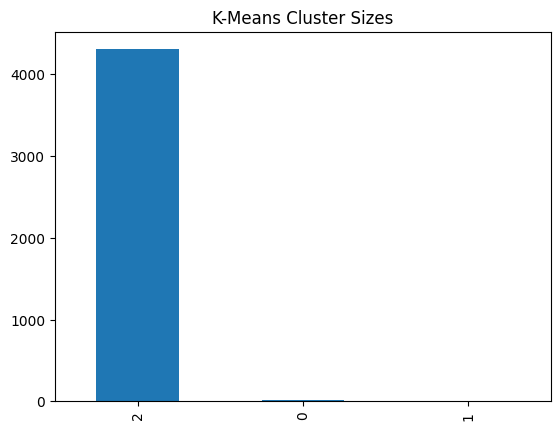

In [29]:
pd.Series(clusters).value_counts().plot(kind='bar')
plt.title("K-Means Cluster Sizes")
plt.show()

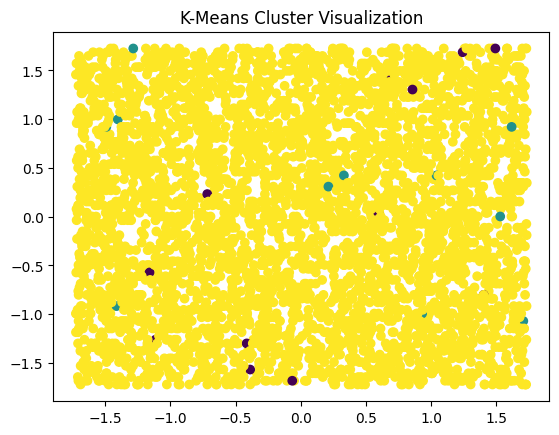

In [53]:
plt.figure()
plt.scatter(X_cls_scaled[:,0], X_cls_scaled[:,1], c=clusters)
plt.title("K-Means Cluster Visualization")
plt.show()

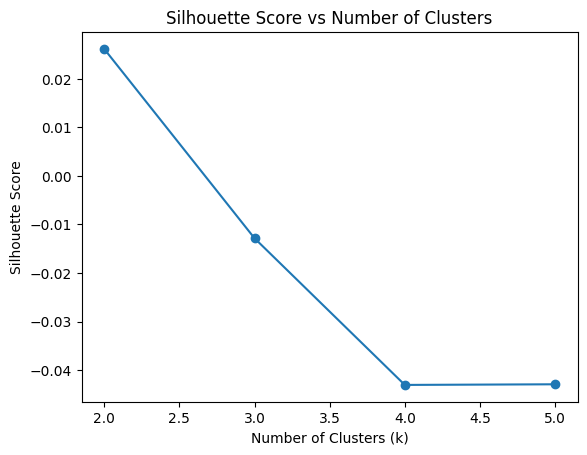

In [44]:
k_values = [2,3,4,5]
sil_scores = []
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_cls_scaled)
    sil_scores.append(silhouette_score(X_cls_scaled, labels))
plt.figure()
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
#HIERARCHY CLUSTER

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linked = linkage(X_cls_scaled[:200], method='ward')
cluster_labels = fcluster(linked, t=3, criterion='maxclust')
print("Hierarchical Silhouette Score:",silhouette_score(X_cls_scaled[:200], cluster_labels))

Hierarchical Silhouette Score: 0.12109736057785227


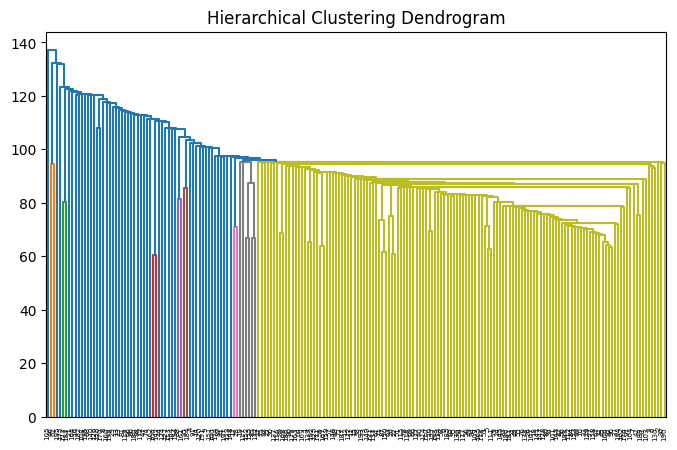

In [31]:
plt.figure(figsize=(8,5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

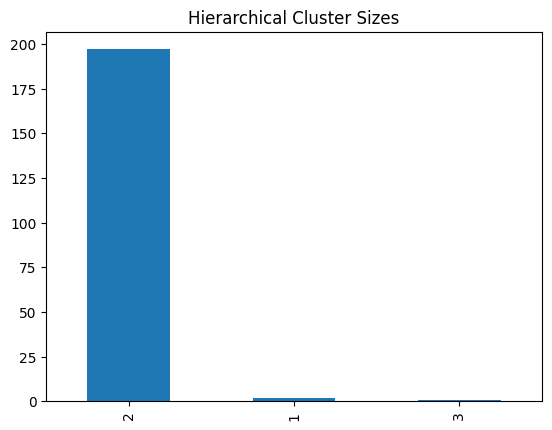

In [33]:
pd.Series(cluster_labels).value_counts().plot(kind='bar')
plt.title("Hierarchical Cluster Sizes")
plt.show()

In [ ]:
#MULTI-LAYER PRECEPTRON (MLP)

In [34]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp.fit(X_train_reg, y_train_reg)
y_pred_mlp = mlp.predict(X_test_reg)
print(y_pred_mlp)

[4.16479821e+03 6.38221274e+02 9.08700233e+02 8.44451270e+00
 7.43564592e+02 4.97241739e+03 1.38426331e+04 7.67522597e+03
 1.19168916e+04 4.21937881e+03 6.88085133e+03 1.07948053e+03
 2.71242516e+01 7.52575450e+03 6.62014585e+03 3.32999757e+03
 2.58267911e+03 1.67430587e+04 6.85752285e+02 4.91243368e+03
 4.01935801e+03 8.44451270e+00 7.40381748e+03 1.49614179e+04
 8.44451270e+00 1.72673181e+03 9.92995360e+02 3.00113944e+03
 1.85576746e+03 6.95963243e+03 5.34365597e+03 8.44451270e+00
 5.94396352e+03 7.28548334e+03 1.51048727e+02 8.44451270e+00
 5.15735902e+03 1.57408810e+04 2.34037697e+03 1.80933561e+04
 2.02516393e+04 2.62732777e+03 1.21782528e+04 1.67955096e+04
 1.60911558e+02 8.64662606e+03 1.06999720e+03 7.26988968e+03
 1.74195978e+04 1.89032186e+04 2.16085914e+02 1.31097892e+03
 6.98346755e+03 1.17787020e+04 4.29003089e+03 1.76381335e+04
 1.47603453e+04 4.06923998e+03 3.88809473e+02 1.30689629e+04
 4.17706149e+03 1.69707814e+04 1.18030647e+04 1.72344490e+03
 1.03375716e+03 1.304593

C:\Users\nagas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
print("MLP MAE:", mean_absolute_error(y_test_reg, y_pred_mlp))
print("MLP RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_mlp)))
print("MLP R2:", r2_score(y_test_reg, y_pred_mlp))

MLP MAE: 20602.08223944936
MLP RMSE: 26466.837141849417
MLP R2: -0.4261772363872123


In [56]:
print("MLP MAE:", mean_absolute_error(y_test_reg, y_pred_mlp))
print("MLP RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_mlp)))
print("MLP R2:", r2_score(y_test_reg, y_pred_mlp))

MLP MAE: 20602.08223944936
MLP RMSE: 26466.837141849417
MLP R2: -0.4261772363872123


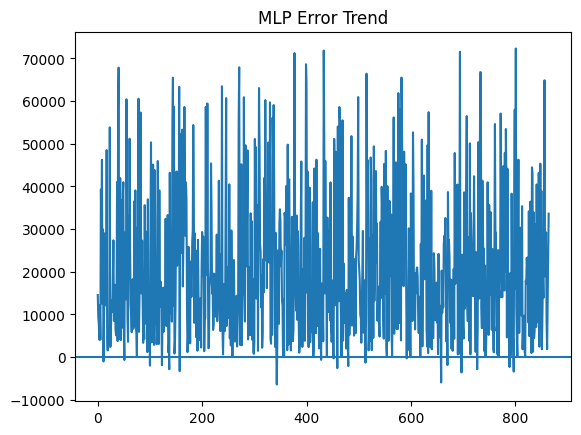

In [36]:
mlp_errors = y_test_reg - y_pred_mlp
plt.plot(mlp_errors.values)
plt.axhline(0)
plt.title("MLP Error Trend")
plt.show()

In [ ]:
#CROSS VALIDATION SCORE

In [37]:
cv_scores = cross_val_score(lr, X_reg_scaled, y_reg, cv=5)
print("\nCROSS VALIDATION MEAN R2:", cv_scores.mean())


CROSS VALIDATION MEAN R2: 0.8801335409447079


In [ ]:
#BAGGING

In [46]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(estimator=LinearRegression(),n_estimators=50,random_state=42)
bagging.fit(X_train_reg, y_train_reg)
y_pred_bag = bagging.predict(X_test_reg)
print("Bagging R2:", r2_score(y_test_reg, y_pred_bag))

Bagging R2: 0.8796411790737838


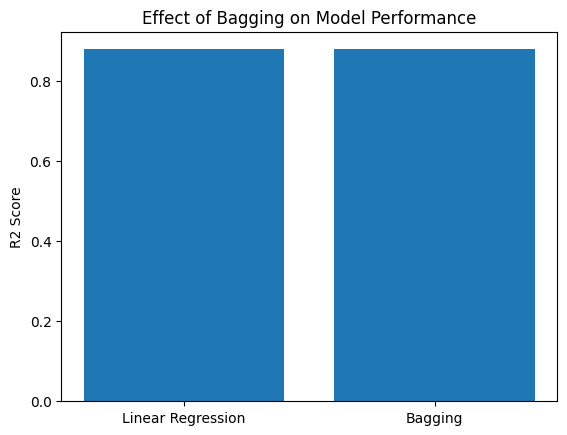

In [48]:
models = ['Linear Regression', 'Bagging']
scores = [r2_score(y_test_reg, y_pred_lr),r2_score(y_test_reg, y_pred_bag)]
plt.figure()
plt.bar(models, scores)
plt.title("Effect of Bagging on Model Performance")
plt.ylabel("R2 Score")
plt.show()